# Natural language processing

## Task 1

Загрузи датасет. Отрисуй Bar-plot с количеством комментариев для каждой категории токсичности 
и комментариев без токсичности.
![sample](../misc/images/bar-plot.png)
Выведи эти количества для каждой категории. 

In [1]:
''' toxic - токсичный,
    severe_toxic - серьезный,
    obscene - непристойный,
    threat - угроза,
    insult - оскорбление,
    identify_hate - идентифицирующий ненависть
'''
import pandas as pd
data = pd.read_csv('../datasets/toxic.csv')
#data.head(2)

In [2]:
data.isnull().values.any() #Проверяем на наличие строк с Nan
data.duplicated().values.any() #проверяем на наличие повторов

False

In [3]:
data['not_toxic'] = data[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]].max(axis=1) #отображаем новые столбец 'not_toxic' и указываем в нем максимальное значение от имеющихся столбцов
data = data.replace({'not_toxic':{0:1, 1:0}})  #заменяем в столбце 'not_toxic' 0 на 1 и наоборот чтобы вывести корректные значения. Так как если в других столбцах все 0 то коммент не токсичный
data.head(7)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,1
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,1
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,1
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,1
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,1
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,0


In [4]:
data_sort = data[["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate", 'not_toxic']].sum().sort_values(ascending=False) #Суммируем значения для подсчета их количества и сортируем по убыванию
data_sort

not_toxic        143346
toxic             15294
obscene            8449
insult             7877
severe_toxic       1595
identity_hate      1405
threat              478
dtype: int64

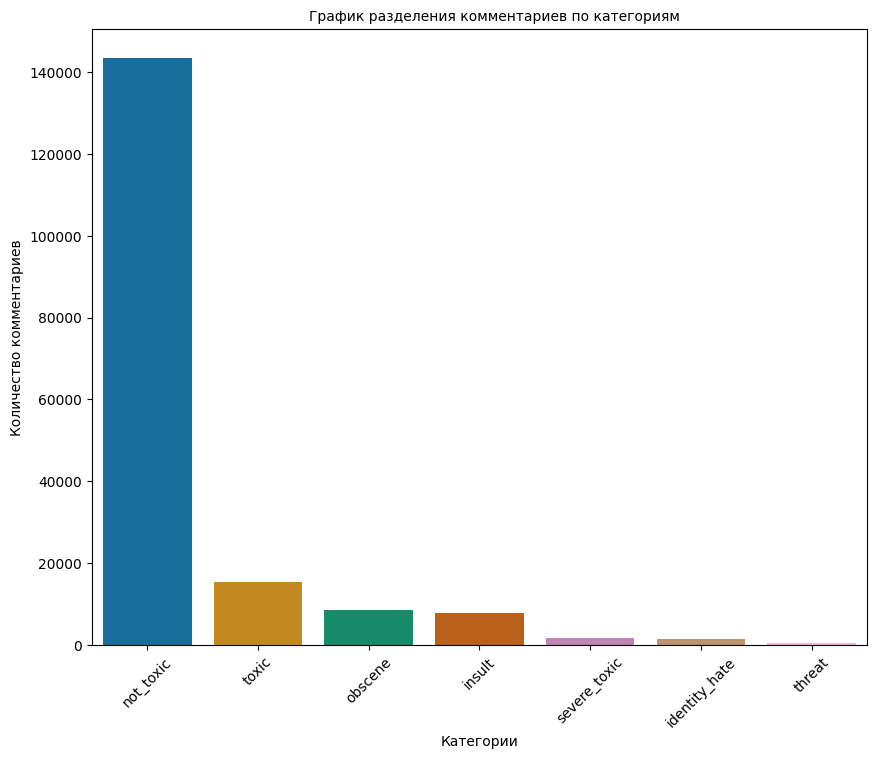

In [5]:
#Отрисуем Bar-plot
import seaborn as sns
import matplotlib.pyplot as plt

ylabel = data_sort.values
xlabel = data_sort.index
#Bar plot
plt.figure(figsize = (10,8))
ax = sns.barplot(x=xlabel, y=ylabel, palette='colorblind', width=0.8)
plt.xticks(rotation=45)
ax.set(xlabel='Категории', ylabel='Количество комментариев')
ax.set_title('График разделения комментариев по категориям',fontsize=10, x= 0.52 , y= 1)
plt.show()

## Task 2

Используя библиотеку [nltk](https://www.nltk.org/) обработайте тексты комментариев: 
* Приведи текст к нижнему регистру и токенизируй
* Оставь токены содержащие английского алфавита 
* Убери знаки препинания, цифры
* Убери стоп-слова из библиотки nltk

Выведи количество токенов для комментария с индексом `000103f0d9cfb60f`

In [ ]:
! pip install nltk
! nltk.download()

In [6]:
import re
import nltk
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [7]:
# снимаем ограничения в pandas на количество выводимых рядов и колонок,
# а также на ширину колонок
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [8]:
# Функция для очистки текста 
def clean_text(text):
    
    # приводим текст к нижнему регистру
    text = text.lower()
    # создаем регулярное выражение для удаления лишних символов
    regular = r'[\*+\#+\№\!\"\-+\+\=+\?+\&\^\.+\;\,+\>+\(\)\/+\:\\+]'
    # удаляем лишние символы
    #text = re.sub(r'[^\w\s]','', text)
    # заменяем числа и цифры на ''
    text = re.sub(r'(\d+\s\d+)|(\d+)','', text)
    
    # удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text)
    # возвращаем очищенные данные
    return text

In [9]:
# создаем список для хранения преобразованных данных 
comment_tokeniz = []
# загружаем стоп-слова для английского языка
stop_words = stopwords.words('english')
# инициализируем лемматайзер
lemmatizer = WordNetLemmatizer()
 
# для каждого сообщения text из столбца data['comment_text']
for text in data['comment_text']:
    # cleaning 
    text = clean_text(text)   
    # tokenization
    text = word_tokenize(text)       
    # удаление стоп-слов
    text = [word for word in text if word not in stop_words and word.isalpha()]     
    # лемматизация
    text = [lemmatizer.lemmatize(w) for w in text]
     
    # добавляем преобразованный текст в список 'comment_text'
    comment_tokeniz.append(text)

#Сохраняем результат преобразования в новой колонке 'comment_text'

data['comment_tokeniz'] = comment_tokeniz

data.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,not_toxic,comment_tokeniz
0,0000997932d777bf,"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",0,0,0,0,0,0,1,"[explanation, edits, made, username, hardcore, metallica, fan, reverted, vandalism, closure, gas, voted, new, york, doll, fac, please, remove, template, talk, page, since, retired]"
1,000103f0d9cfb60f,"D'aww! He matches this background colour I'm seemingly stuck with. Thanks. (talk) 21:51, January 11, 2016 (UTC)",0,0,0,0,0,0,1,"[match, background, colour, seemingly, stuck, thanks, talk, january, utc]"


In [10]:
comment_id = data[data['id'] == '000103f0d9cfb60f']
print('Количество токенов:', len(comment_id.iloc[0]['comment_tokeniz']))
# token_id = comment_id.iloc[0]['comment_text']
# print('Количество токенов:', len(token_id))

Количество токенов: 9


## Task 3

Раздели выборку на тренировачную и тестовоую с параметрами `random_state=21, test_size=0.3, shuffle=True`
Преобразуй тексты комментариев с помощью [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) с количеством признаков равный 3000. \
Выведи размерность тренировачной выборки после преобразования текста.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

data['Token_comment'] = [' '.join(item) for item in data['comment_tokeniz']]  #применила данный код чтобы skealern смог считать необходимый тип данных. При отсутствии строки возникает ошибка
X = data['Token_comment']
Y = data.drop(['id','Token_comment', 'comment_text', 'comment_tokeniz'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                    test_size=0.3, 
                                                    random_state=21,
                                                    shuffle=True)

In [12]:
vectorizer = TfidfVectorizer(max_features=3000)
vectorizer.fit(X_train)
vectorizer.fit(X_test)
X_train_transform = vectorizer.transform(X_train)
X_test_transform = vectorizer.transform(X_test)

print('Размерность тренировачной выборки после преобразования текста:', X_train_transform.shape)

Размерность тренировачной выборки после преобразования текста: (111699, 3000)


## Task 4

Реши задачу [Multi-Label](https://scikit-learn.org/stable/modules/multiclass.html) классификации используя [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier).
Посчитай значение ROC-AUC для тестовой выборки.

In [13]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score

clf = RidgeClassifier()
clf.fit(X_train_transform, Y_train)
Y_pred = clf.predict(X_test_transform) #предсказанные значения тестовой выборки
ROC_AUC1 = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC: ", ROC_AUC1)

ROC-AUC:  0.6722135750085781


## Task 5

Есть посмотреть на тексты токсичных комментариев, то можно заметить, что они могут повторять одни и те же слова. Или там чаще встречается `!` знаки. \
Кроме 'прямых' текстовых признаков, можно использоваться и эту статистику по тексту. Например, долю уникальных слов в тексте комментария или количество пунктуации в тексте.

Придумай не меньше 4х признаков, которые могут помочь в обучении модели. Добавьте их к признакам TF-IDF и обучите модель. 
Получилось ли увеличить качество классификации?

In [14]:
unique_words = []
for item in text:
    if item not in unique_words:
        unique_words.append(item)
        res = ''
for parameters in unique_words:
    res += ' ' + ' '.join(parameters)
#список сокращений
q = set(res)

In [15]:
# 1. доля caps_lock 
c = sum(bool(X) for X in data['comment_text']) #список Caps
caps_lock_train = X_train.apply(lambda x: (len(x.split()))/c)
caps_lock_test = X_test.apply(lambda x: (len(x.split()))/c)

# 2. количество восклицательных знаков
exclamation_point_train = data.loc[X_train.index]['comment_text'].apply(lambda x: x.count('!'))
exclamation_point_test = data.loc[X_test.index]['comment_text'].apply(lambda x: x.count('!'))

# 3. доля сокращений
abbreviation = set(res)
abbreviation_train = data.loc[X_train.index]['comment_text'].apply(lambda x: len(set(x.lower().split()).intersection(abbreviation))/len(set(x.lower().split())))
abbreviation_test = data.loc[X_test.index]['comment_text'].apply(lambda x: len(set(x.lower().split()).intersection(abbreviation))/len(set(x.lower().split())))

# 4. доля ругательств
censored_words = set(['fuck','fac','fucking', 'poop ', 'loser', 'sucker', 'bitch', 'hell','shit','ass','asshole','stupid', 'cocksucker', 'piss', 'fool', 'wtf',
                     'prick', 'dick', 'cunt', 'pussy', 'gay', 'faggot', 'homo', 'douchebagd', 'nigger'])
censored_words_train = data.loc[X_train.index]['comment_text'].apply(lambda x:len(set(x.lower().split()).intersection(censored_words))/len(set(x.lower().split())))
censored_words_test = data.loc[X_test.index]['comment_text'].apply(lambda x: len(set(x.lower().split()).intersection(censored_words))/len(set(x.lower().split())))

# уникальные слова
unique_words_train = data.loc[X_train.index]['comment_text'].apply(lambda x: len(set(x.lower().split()).intersection(unique_words))/len(set(x.lower().split())))
unique_words_test = data.loc[X_test.index]['comment_text'].apply(lambda x: len(set(x.lower().split()).intersection(unique_words))/len(set(x.lower().split())))

In [16]:
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse import hstack

#объединение новых признаков с признаками TF-IDF
new_train = csr_matrix(np.array([exclamation_point_train, abbreviation_train, censored_words_train, caps_lock_train, unique_words_train]).T)
new_test = csr_matrix(np.array([exclamation_point_test, abbreviation_test, censored_words_test, caps_lock_test, unique_words_test]).T)

#Складываем разреженные матрицы по столбцам
X_train_combined = hstack((X_train_transform, new_train))
X_test_combined = hstack((X_test_transform, new_test))

In [17]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import roc_auc_score

model = RidgeClassifier()
model.fit(X_train_combined, Y_train)
Y_pred = model.predict(X_test_combined)
ROC_AUC2 = roc_auc_score(Y_test, Y_pred)
print("ROC-AUC: ", ROC_AUC2)

ROC-AUC:  0.6741007183504121


In [18]:
if ROC_AUC2 > ROC_AUC1:
    print('Качество классификации улучшилось')
else:
    print('Качество классификации ухудшилось')

Качество классификации улучшилось


In [19]:
ROC_AUC2, ROC_AUC1

(0.6741007183504121, 0.6722135750085781)